In [1]:
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import numpy as np
import os
from pathlib import Path
import json
import collections
from src.visualize import filter_path_1, filter_path_2, get_scores, get_scores_json, plot_scores, calculate_average_ranking, calculate_average_score

In [2]:
TASK_GROUP = "BigBench"
TASK_PLOT_PATH = f"/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/exp1/task_plots/TASK_GROUP"
if not os.path.exists(TASK_PLOT_PATH):
    os.makedirs(TASK_PLOT_PATH)

In [3]:
import os
import time

def get_last_modified_date(path, filename):
    files_dates = []
    for root_dir, dirs, files in os.walk(path):
        for file in files:
            if file == filename:
                file_path = os.path.join(root_dir, file)
                timestamp = os.path.getmtime(file_path)
                files_dates.append((file_path, timestamp))

    # Sort files by date
    files_dates.sort(key=lambda x: x[1])

    for file_path, timestamp in files_dates:
        last_modified_date = time.ctime(timestamp)
        print(f"File: {file_path} Last Modified: {last_modified_date}")



# Replace 'your_directory_path' and 'your_file_name' with your values
dir_path = "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/pythia/experiment_1/huggingface/flan_v1"
filename = "results.json"
# get_last_modified_date(dir_path, filename)

In [4]:
eval_ds = 'NLI_2'
n_samples = 200
tasks = ['NLI', 
         'Coreference', 
         'Math', 
         'Paraphrase',
         'QA', 
         'Reading Comp.']
base_path = f'./models/pythia/experiment_1/huggingface/flan_v1/c4_mixed_NLI/EleutherAI/pythia-160M-deduped_ckpt_False/checkpoint-70000/inference/flan_v1_task_ds/'

folders = [os.path.join(base_path, f"ds_key:{task}/n_samples_{n_samples}") for task in tasks]
# assert that all folders/files exists
# Check if all folders exist
for folder in folders:
    if not os.path.exists(folder):
        print(f"Folder does not exist: {folder}")


fig_save_path = "./models/pythia/experiment_1"
if not os.path.exists(fig_save_path):
    os.makedirs(fig_save_path)
# keywords = ["sentiment", "dataset", "checkpoint", "promptsource", "decoding", "gpt2", "c4", 'P_1_PQA']

print("Number of folders: ", len(folders))
keywords = ["ds_key:", "160M"]

Number of folders:  6


In [5]:
model_paths = [
    "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/pythia/experiment_1/huggingface/flan_v1/c4_mixed_NLI/EleutherAI/pythia-1.4B-deduped_ckpt_False/checkpoint-70000",
    "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/pythia/experiment_1/huggingface/flan_v1/c4_mixed_NLI/EleutherAI/pythia-160M-deduped_ckpt_False/checkpoint-70000",    
    "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/pythia/experiment_1/huggingface/flan_v1/ds_c4_small/EleutherAI/pythia-1.4B-deduped_ckpt_False/checkpoint-70000",
    "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/pythia/experiment_1/huggingface/flan_v1/ds_c4_small/EleutherAI/pythia-160M-deduped_ckpt_False/checkpoint-70000",
    "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/pythia/experiment_1/huggingface/flan_v1/c4_mixed_Summarization/EleutherAI/pythia-160M-deduped_ckpt_False/checkpoint-70000",
    "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/pythia/experiment_1/huggingface/flan_v1/c4_mixed_QA/EleutherAI/pythia-160M-deduped_ckpt_False/checkpoint-70000",
    "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/pythia/experiment_1/huggingface/flan_v1/c4_mixed_Commonsense/EleutherAI/pythia-160M-deduped_ckpt_False/checkpoint-70000",
    "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/pythia/experiment_1/huggingface/flan_v1/c4_mixed_QA/EleutherAI/pythia-1.4B-deduped_ckpt_False/checkpoint-70000",
    "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/pythia/experiment_1/huggingface/flan_v1/c4_mixed_Commonsense/EleutherAI/pythia-1.4B-deduped_ckpt_False/checkpoint-70000",
    "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/pythia/experiment_1/huggingface/flan_v1/c4_mixed_Summarization/EleutherAI/pythia-1.4B-deduped_ckpt_False/checkpoint-70000",
    # "/share/edc/home/antonis/LLM-Incidental-Supervision/lm-evaluation-old/lm-evaluation-harness/exp1_models/c4_mixed_QA_NLI_Summarization_Commonsense/EleutherAI/pythia-1.4B-deduped_ckpt_False/checkpoint-70000",
    # "/share/edc/home/antonis/LLM-Incidental-Supervision/lm-evaluation-old/lm-evaluation-harness/exp1_models/c4_mixed_QA_NLI_Summarization_Commonsense/EleutherAI/pythia-160M-deduped_ckpt_False/checkpoint-70000"
    # "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/NLI_2/P_1_PQA_5_psource_True_prompt_False/dataset_1/gpt2_ckpt_True/checkpoint-50000",

]

is_few_shot = False

if is_few_shot is False:
    results_subdir = "inference/bigbench"
else:
    results_subdir = "inference/BIGBENCH/3-shot"
TASKS = ["MATH_TASKS", "NLI_TASKS", "READING_COMP_TASKS", "COMMONSENSE_TASKS", "SENTIMENT_TASKS", "CLOSED_BOOK_QA", "OPEN_BOOK_QA"]
keywords_1 = ["c4", "1.4B", "160M", "410M", "gpt2", 
              "P_1_PQA_5", "P_1_PQA_1", "psource_False", "psource_True", "prompt_False", "prompt_True"] # + TASKS
keywords_2 = ["c4",  "QA", "Commonsense", "Summarization", "NLI", "1.4B", "160M", "410M", "gpt2", 
              "P_1_PQA_5", "P_1_PQA_1", "psource_False", "psource_True", "prompt_False", "prompt_True"]
results_dict = collections.defaultdict(dict)

all_files = [
    
]
results_dict = collections.defaultdict(dict)
for model_path in model_paths:
    for root, dirs, files in os.walk(model_path):
        if os.path.join(results_subdir) in root and 'results.json' in files:
            result_file = os.path.join(root, 'results.json')
            all_files.append(result_file)
            with open(result_file, "r") as f:
                results = json.load(f)
                filtered_path = filter_path_2(filter_path_1(result_file, keywords_1), keywords_2)
                # Extract dataset name from the path
                relative_path = os.path.relpath(root, model_path)
                dataset = relative_path.split(os.sep)[0]
                # Merge the results under the model key
                if 'results' in results:
                    for dataset_name, dataset_results in results['results'].items():
                        results_dict[dataset_name][filtered_path] = dataset_results
print(f"Found results for {len(results_dict)} models.")

# load first file
with open(all_files[0], "r") as f:
    results = json.load(f)

task_to_dataset = {
    TASK_GROUP : [dataset for dataset in results['results'].keys()]
}

required_models = set([filter_path_2(filter_path_1(path, keywords_1), keywords_2) for path in model_paths])

def check_datasets(results_dict, task_to_dataset, required_models):
    missing_datasets = []
    for task, dataset_list in task_to_dataset.items():
        for dataset in dataset_list:
            if dataset not in results_dict:
                missing_datasets.append((task, dataset))
            else:
                for model in required_models:
                    if model not in results_dict[dataset]:
                        missing_datasets.append((task, dataset, model))
    return missing_datasets

missing_datasets = check_datasets(results_dict, task_to_dataset, required_models)

if missing_datasets:
    print("Missing datasets:")
    for missing in missing_datasets:
        if len(missing) == 3:
            task, dataset, model = missing
            print(f"Task: {task}, Dataset: {dataset}, Model: {model}")
        else:
            task, dataset = missing
            print(f"Task: {task}, Dataset: {dataset}")
else:
    print("All models have all the required datasets for all tasks.")

# Initialize the nested dictionary
results_dict_tasks = collections.defaultdict(lambda: collections.defaultdict(dict))

# Iterate over the results_dict
for dataset, models in results_dict.items():
    # Iterate over the models for each dataset
    for model, results in models.items():
        # Find the task corresponding to the dataset
        for task, dataset_list in task_to_dataset.items():
            if dataset in dataset_list:
                # Add the results to the nested dictionary under the dataset->model->task
                results_dict_tasks[task][model][dataset] = results

print(f"Found results for {len(results_dict_tasks)} datasets.")

Found results for 21 models.
All models have all the required datasets for all tasks.
Found results for 1 datasets.


In [6]:
if 'bigbench' in results_dict_tasks:
    # rename to BigBench
    results_dict_tasks['BigBench'] = results_dict_tasks['bigbench']
    del results_dict_tasks['bigbench']

In [7]:
len(task_to_dataset[TASK_GROUP])

21

In [8]:
required_models

required_models_1 = [filter_path_1(path, keywords_1) for path in model_paths]
required_models = [filter_path_2(filter_path_1(path, keywords_1), keywords_2) for path in model_paths]

print(required_models_1)
print(required_models)

print(len(required_models_1))
print(len(required_models))

print(len(set(required_models_1)))
print(len(set(required_models)))

['c4_mixed_NLI/pythia-1.4B-deduped_ckpt_False', 'c4_mixed_NLI/pythia-160M-deduped_ckpt_False', 'ds_c4_small/pythia-1.4B-deduped_ckpt_False', 'ds_c4_small/pythia-160M-deduped_ckpt_False', 'c4_mixed_Summarization/pythia-160M-deduped_ckpt_False', 'c4_mixed_QA/pythia-160M-deduped_ckpt_False', 'c4_mixed_Commonsense/pythia-160M-deduped_ckpt_False', 'c4_mixed_QA/pythia-1.4B-deduped_ckpt_False', 'c4_mixed_Commonsense/pythia-1.4B-deduped_ckpt_False', 'c4_mixed_Summarization/pythia-1.4B-deduped_ckpt_False']
['c4 NLI 1.4B', 'c4 NLI 160M', 'c4 1.4B', 'c4 160M', 'c4 Summarization 160M', 'c4 QA 160M', 'c4 Commonsense 160M', 'c4 QA 1.4B', 'c4 Commonsense 1.4B', 'c4 Summarization 1.4B']
10
10
10
10


In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

for dataset, models in results_dict.items():
    # Extract F1 scores for all models for the dataset
    f1_scores = [metrics.get('f1') for metrics in models.values() if 'f1' in metrics]
    
    # Remove None values if 'f1' key did not exist in any model
    f1_scores = [score for score in f1_scores if score is not None]
    
    if f1_scores:  # Check if f1_scores list is not empty
        # Reshape the scores to fit the scaler
        f1_scores = np.array(f1_scores).reshape(-1, 1)
        
        # Fit the scaler and transform the scores
        normalized_scores = scaler.fit_transform(f1_scores)
        
        # Scale the normalized scores to a range between 0 and 0.5
        scaled_scores = normalized_scores * 0.5
        
        # Update the F1 scores in the results_dict
        for model, scaled_score in zip(models.keys(), scaled_scores):
            if 'f1' in models[model]:
                models[model]['f1'] = scaled_score[0]

In [10]:
import json

metrics_dict = {
    'squad2': 'f1',
}

# Accessing the 'MATH_TASKS' results from the results dictionary
accuracy_results = collections.defaultdict(lambda: collections.defaultdict(dict))
required_metric = ('multiple_choice_grade', 'multiple_choice_grade_stderr')
alternate_metric = ('acc', 'acc_stderr')

for task in results_dict_tasks:
    task_results = results_dict_tasks[task]
    for model in task_results:
        model_results = task_results[model]
        datasets_metric = []
        for dataset in model_results:
            dataset_results = model_results[dataset]
            metric_used = None
            if required_metric[0] in dataset_results and required_metric[1] in dataset_results:
                metric_used = required_metric
            elif alternate_metric[0] in dataset_results and alternate_metric[1] in dataset_results:
                metric_used = alternate_metric
            elif dataset in metrics_dict:
                metric_used = metrics_dict[dataset]
            else:
                print(f"Neither required nor alternate metric found in task {task} dataset {dataset}")
                continue
            if isinstance(metric_used, tuple):
                datasets_metric.append(dataset_results[metric_used[0]])
            else:
                datasets_metric.append(dataset_results[metric_used])
            model_dict = accuracy_results[task].setdefault(model, {})
            model_dict['metric'] = np.mean(datasets_metric)

In [11]:
# filename_txt = 'rank.txt'
# scores_dict = get_scores(folders, filename_txt)
# title = 'Rank Classification (Lower is Better)'
# plot_scores(scores_dict, title)

In [12]:
# filename_logprob = 'log_probs.txt'
# scores_dict = get_scores(folders, filename_logprob)
# title = 'Log Probability (Less negative is Better)'
# plot_scores(scores_dict, title)

In [13]:
# file_paths = folders

# rank_dict = get_scores_json(file_paths, 'rank.json')
# logprob_dict = get_scores_json(file_paths, 'log_probs.json')


# print(len(rank_dict))

In [14]:
tasks = list(task_to_dataset.keys())
metric = ['multiple_choice_grade', 'multiple_choice_grade_stderr']
n_datasets = len(results_dict.keys())

import matplotlib.colors as mcolors

# Get a list of unique model names
unique_models = list(set([model for _, models in results_dict.items() for model in models]))

# # Create a color map
# colors = plt.cm.get_cmap('tab10', len(unique_models))

# # Create a dictionary mapping model names to colors
# model_to_color = {model: colors(i) for i, model in enumerate(unique_models)}

model_to_color = {
    'c4 QA 160M': (0.6, 0.8, 1.0, 1.0),  # Lighter blue
    'c4 QA 1.4B': (0.1, 0.4, 0.7, 1.0),  # Darker blue
    'c4 Summarization 160M': (1.0, 0.8, 0.6, 1.0),  # Lighter orange
    'c4 Summarization 1.4B': (1.0, 0.5, 0.1, 1.0),  # Darker orange
    'c4 NLI 160M': (0.6, 1.0, 0.6, 1.0),  # Lighter green
    'c4 NLI 1.4B': (0.1, 0.7, 0.1, 1.0),  # Darker green
    'c4 Commonsense 160M': (0.8, 0.8, 1.0, 1.0),  # Lighter purple
    'c4 Commonsense 1.4B': (0.5, 0.1, 0.8, 1.0),  # Darker purple
    'c4 160M': (0.6, 0.9, 0.9, 1.0),  # Lighter cyan
    'c4 1.4B': (0.1, 0.7, 0.7, 1.0)  # Darker cyan
}

dataset_to_color = {
    'c4': (0.6, 0.9, 0.9, 1.0),  # Lighter cyan
    'c4 QA': (0.6, 0.8, 1.0, 1.0),  # Lighter blue
    'c4 NLI': (0.6, 1.0, 0.6, 1.0),  # Lighter green
    'c4 Summarization': (1.0, 0.8, 0.6, 1.0),  # Lighter orange
    'c4 Commonsense': (0.8, 0.8, 1.0, 1.0),  # Lighter purple
}

In [15]:
# for task in tasks:
#     datasets = task_to_dataset[task]
#     n_datasets = len(datasets)
#     num_cols = 3
#     num_rows = max(1, (n_datasets // num_cols) + 1)

#     fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))

#     axs = axs.flatten()
#     title = 'Accuracy'

#     for ax, dataset in zip(axs, datasets):
#         models = results_dict[dataset]
#         model_names = []
#         model_scores = []
#         model_colors = []  # List to store colors for each model
#         for model, results in models.items():
#             sel_metric = metric[0] if metric[0] in results else metric[1]
#             if sel_metric not in results:
#                 continue
#             model_names.append(model)
#             model_scores.append(results[sel_metric])
#             model_colors.append(model_to_color[model])  # Get the color for the model

#         # Sort the scores and their corresponding names and colors
#         sorted_scores_indices = np.argsort(model_scores)
#         model_scores = [model_scores[i] for i in sorted_scores_indices]
#         model_names = [model_names[i] for i in sorted_scores_indices]
#         model_colors = [model_colors[i] for i in sorted_scores_indices]

#         bars = ax.bar(model_names, model_scores, color=model_colors)  # Add color parameter to bar plot
#         ax.set_title(dataset)
#         # if max(model_scores) < 1:
#         #     ax.set_ylim([0, 1])
#         # else:
#         #     ax.set_ylim([0, max(model_scores)*1.2])
#         ax.set_ylabel(sel_metric)
#         ax.set_xticklabels([])  # Remove x-labels

#         # Create a legend only for the first axis
#         if ax is axs[0]:
#             handles = [plt.Rectangle((0,0),1,1, color=model_to_color[model]) for model in unique_models]
#             ax.legend(handles, unique_models, title="Models", loc='upper left', bbox_to_anchor=(0, 1), fontsize='small')

#         # SAVE
#         plt.savefig(f"{TASK_PLOT_PATH}/{task}.png", bbox_inches='tight')

#     plt.suptitle(task)  # Set the figure title to the task name
#     plt.tight_layout()
#     plt.show()

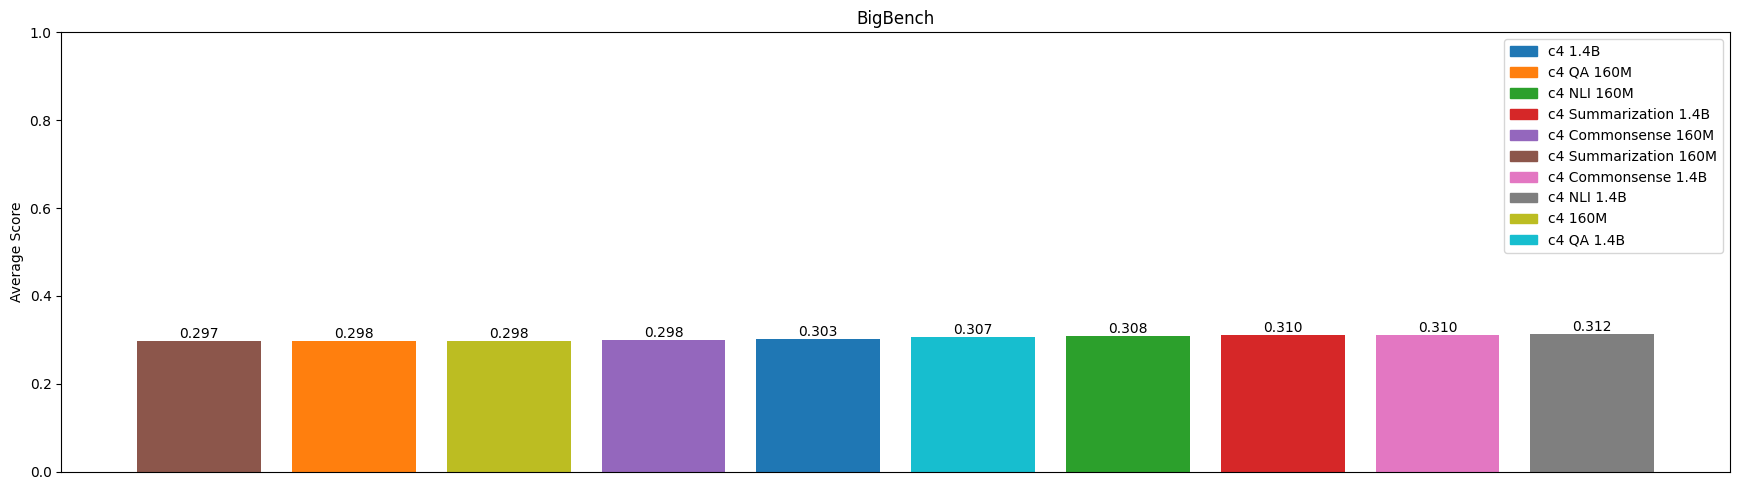

In [16]:
# Determine the number of rows needed for the subplots
num_tasks = len(accuracy_results)
num_cols = 1
num_rows = num_tasks // num_cols + (num_tasks % num_cols > 0)

# Create a figure with multiple subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(17.5, num_rows * 5))

if isinstance(axs, np.ndarray):
    axs = axs.flatten()
else:
    axs = [axs]

# Iterate over the tasks and plot each on a different axis
title = 'Accuracy'
for ax, (task, accuracy_task) in zip(axs, accuracy_results.items()):
    plot_scores(accuracy_task, keywords=keywords, 
                title=task, metric='metric', std_metric=None, ax=ax)

# If there are more axes than tasks, remove the extra ones
for ax in axs[num_tasks:]:
    ax.remove()

plt.savefig(f"{TASK_PLOT_PATH}/all_tasks.png", bbox_inches='tight')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [17]:
average_rankings = calculate_average_ranking(accuracy_results)
average_score = calculate_average_score(accuracy_results)
print(average_rankings)
print(average_score)

{'c4 NLI 1.4B': 1.0, 'c4 Commonsense 1.4B': 2.0, 'c4 Summarization 1.4B': 3.0, 'c4 NLI 160M': 4.0, 'c4 QA 1.4B': 5.0, 'c4 1.4B': 6.0, 'c4 Commonsense 160M': 7.0, 'c4 160M': 8.0, 'c4 QA 160M': 9.0, 'c4 Summarization 160M': 10.0}
{'c4 NLI 1.4B': 0.3121110448242667, 'c4 Commonsense 1.4B': 0.30988872364436565, 'c4 Summarization 1.4B': 0.30974081812929927, 'c4 NLI 160M': 0.30824651576705303, 'c4 QA 1.4B': 0.3071672672642373, 'c4 1.4B': 0.30275715795899033, 'c4 Commonsense 160M': 0.298433430893875, 'c4 160M': 0.29799745912976094, 'c4 QA 160M': 0.2978883375663244, 'c4 Summarization 160M': 0.2966027077403762}


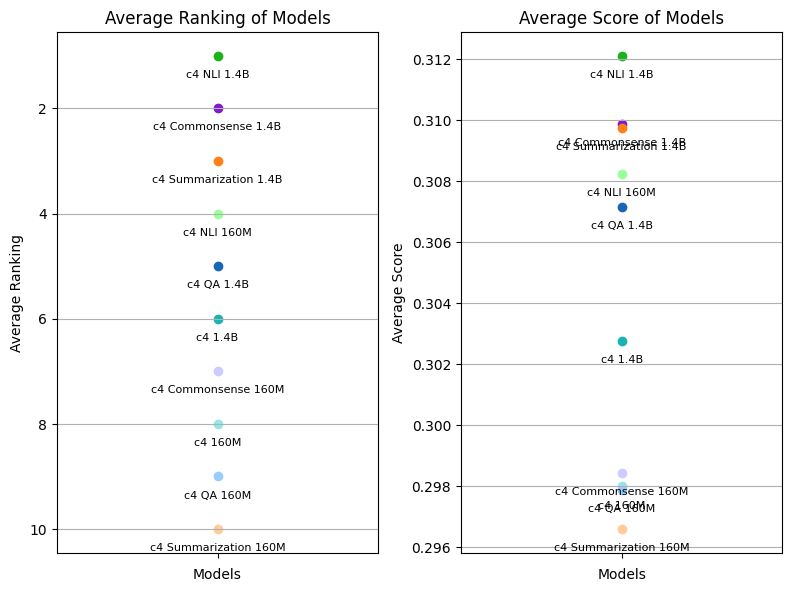

In [18]:
# Create lists for the plot
models_rankings = list(average_rankings.keys())
avg_rankings = list(average_rankings.values())

models_scores = list(average_score.keys())
avg_scores = list(average_score.values())

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 6))

# Plot average rankings
for i, model in enumerate(models_rankings):
    axs[0].scatter('', avg_rankings[i], color=model_to_color[model])
axs[0].set_xlabel('Models')
axs[0].set_ylabel('Average Ranking')
axs[0].set_title('Average Ranking of Models')
for i, model in enumerate(models_rankings):
    axs[0].annotate(model, ('', avg_rankings[i]), xytext=(0, -10), textcoords='offset points', ha='center', va='top', fontsize=8)
axs[0].invert_yaxis()
axs[0].grid(axis='y')

# Plot average scores
for i, model in enumerate(models_scores):
    axs[1].scatter('', avg_scores[i], color=model_to_color[model])
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Average Score')
axs[1].set_title('Average Score of Models')
for i, model in enumerate(models_scores):
    axs[1].annotate(model, ('', avg_scores[i]), xytext=(0, -10), textcoords='offset points', ha='center', va='top', fontsize=8)
axs[1].grid(axis='y')

plt.tight_layout(pad=1.0)  # Increase padding
plt.show()

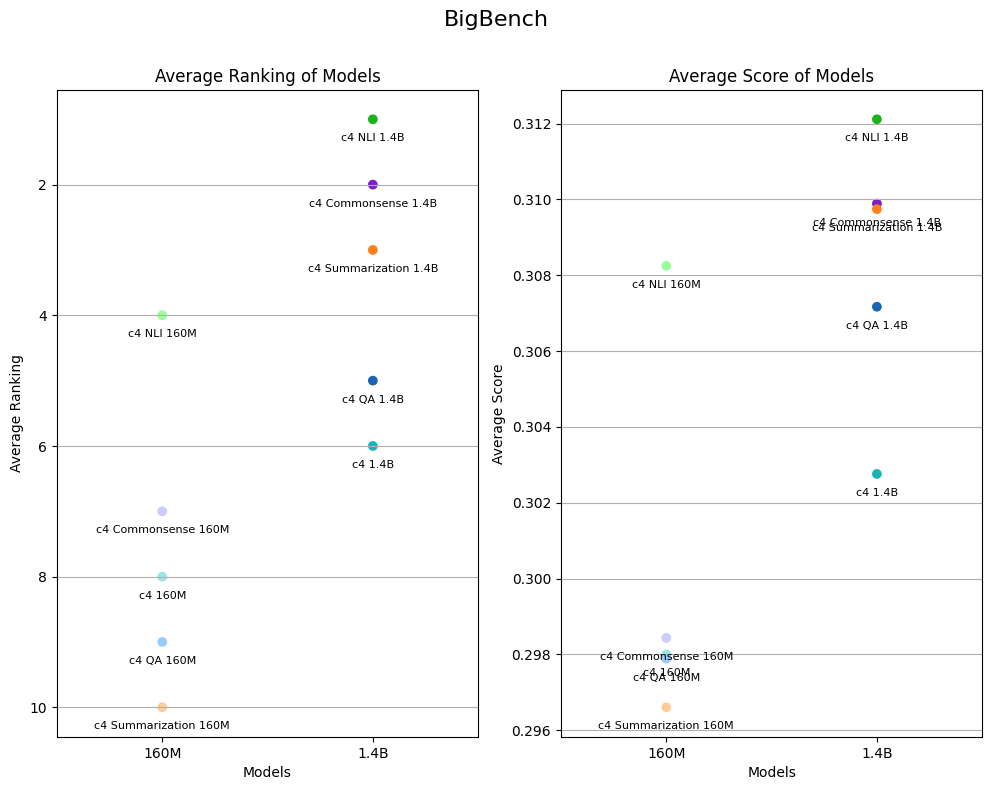

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Create lists for the plot
models_rankings = list(average_rankings.keys())
avg_rankings = list(average_rankings.values())

models_scores = list(average_score.keys())
avg_scores = list(average_score.values())

# Separate models based on parameter size
models_160M_rankings = [model for model in models_rankings if '160M' in model]
avg_rankings_160M = [avg_rankings[models_rankings.index(model)] for model in models_160M_rankings]

models_4B_rankings = [model for model in models_rankings if '4B' in model]
avg_rankings_4B = [avg_rankings[models_rankings.index(model)] for model in models_4B_rankings]

models_160M_scores = [model for model in models_scores if '160M' in model]
avg_scores_160M = [avg_scores[models_scores.index(model)] for model in models_160M_scores]

models_4B_scores = [model for model in models_scores if '4B' in model]
avg_scores_4B = [avg_scores[models_scores.index(model)] for model in models_4B_scores]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

# Add the overarching title
fig.suptitle(TASK_GROUP, fontsize=16)

# Plot average rankings
axs[0].scatter(['160M']*len(models_160M_rankings), avg_rankings_160M, color=[model_to_color[model] for model in models_160M_rankings])
axs[0].scatter(['1.4B']*len(models_4B_rankings), avg_rankings_4B, color=[model_to_color[model] for model in models_4B_rankings])

# Add model names as annotations
for i, model in enumerate(models_160M_rankings):
    axs[0].annotate(model, ('160M', avg_rankings_160M[i]), xytext=(0, -10), textcoords='offset points', ha='center', va='top', fontsize=8)
for i, model in enumerate(models_4B_rankings):
    axs[0].annotate(model, ('1.4B', avg_rankings_4B[i]), xytext=(0, -10), textcoords='offset points', ha='center', va='top', fontsize=8)

axs[0].set_xlabel('Models')
axs[0].set_ylabel('Average Ranking')
axs[0].set_title('Average Ranking of Models')
axs[0].invert_yaxis()
axs[0].grid(axis='y')
axs[0].set_xlim(-0.5, 1.5)  # Adjust x-axis limits

# Plot average scores
axs[1].scatter(['160M']*len(models_160M_scores), avg_scores_160M, color=[model_to_color[model] for model in models_160M_scores])
axs[1].scatter(['1.4B']*len(models_4B_scores), avg_scores_4B, color=[model_to_color[model] for model in models_4B_scores])

# Add model names as annotations
for i, model in enumerate(models_160M_scores):
    axs[1].annotate(model, ('160M', avg_scores_160M[i]), xytext=(0, -10), textcoords='offset points', ha='center', va='top', fontsize=8)
for i, model in enumerate(models_4B_scores):
    axs[1].annotate(model, ('1.4B', avg_scores_4B[i]), xytext=(0, -10), textcoords='offset points', ha='center', va='top', fontsize=8)

axs[1].set_xlabel('Models')
axs[1].set_ylabel('Average Score')
axs[1].set_title('Average Score of Models')
axs[1].grid(axis='y')
axs[1].set_xlim(-0.5, 1.5)  # Adjust x-axis limits

plt.tight_layout(pad=1.0)  # Increase padding
plt.subplots_adjust(top=0.88)  # Adjust the top padding after adding the title
plt.show()

In [20]:

hatch_dict = {
    '160M': '/',
    '1.4B': '///'
}

new_results_dict = {}

for dataset, models in results_dict.items():
    new_results_dict[dataset] = {}
    for model, results in models.items():
        # Split the model name into training set and parameter size
        split_model = model.split(' ')
        if len(split_model) == 2:
            training_set, param_size = split_model
        elif len(split_model) == 3:
            pre_training_set, training_set, param_size = split_model
            training_set = pre_training_set + ' ' + training_set
        if training_set not in new_results_dict[dataset]:
            new_results_dict[dataset][training_set] = {}
        new_results_dict[dataset][training_set][param_size] = results

/tmp/ipykernel_2270572/2085165818.py:106: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


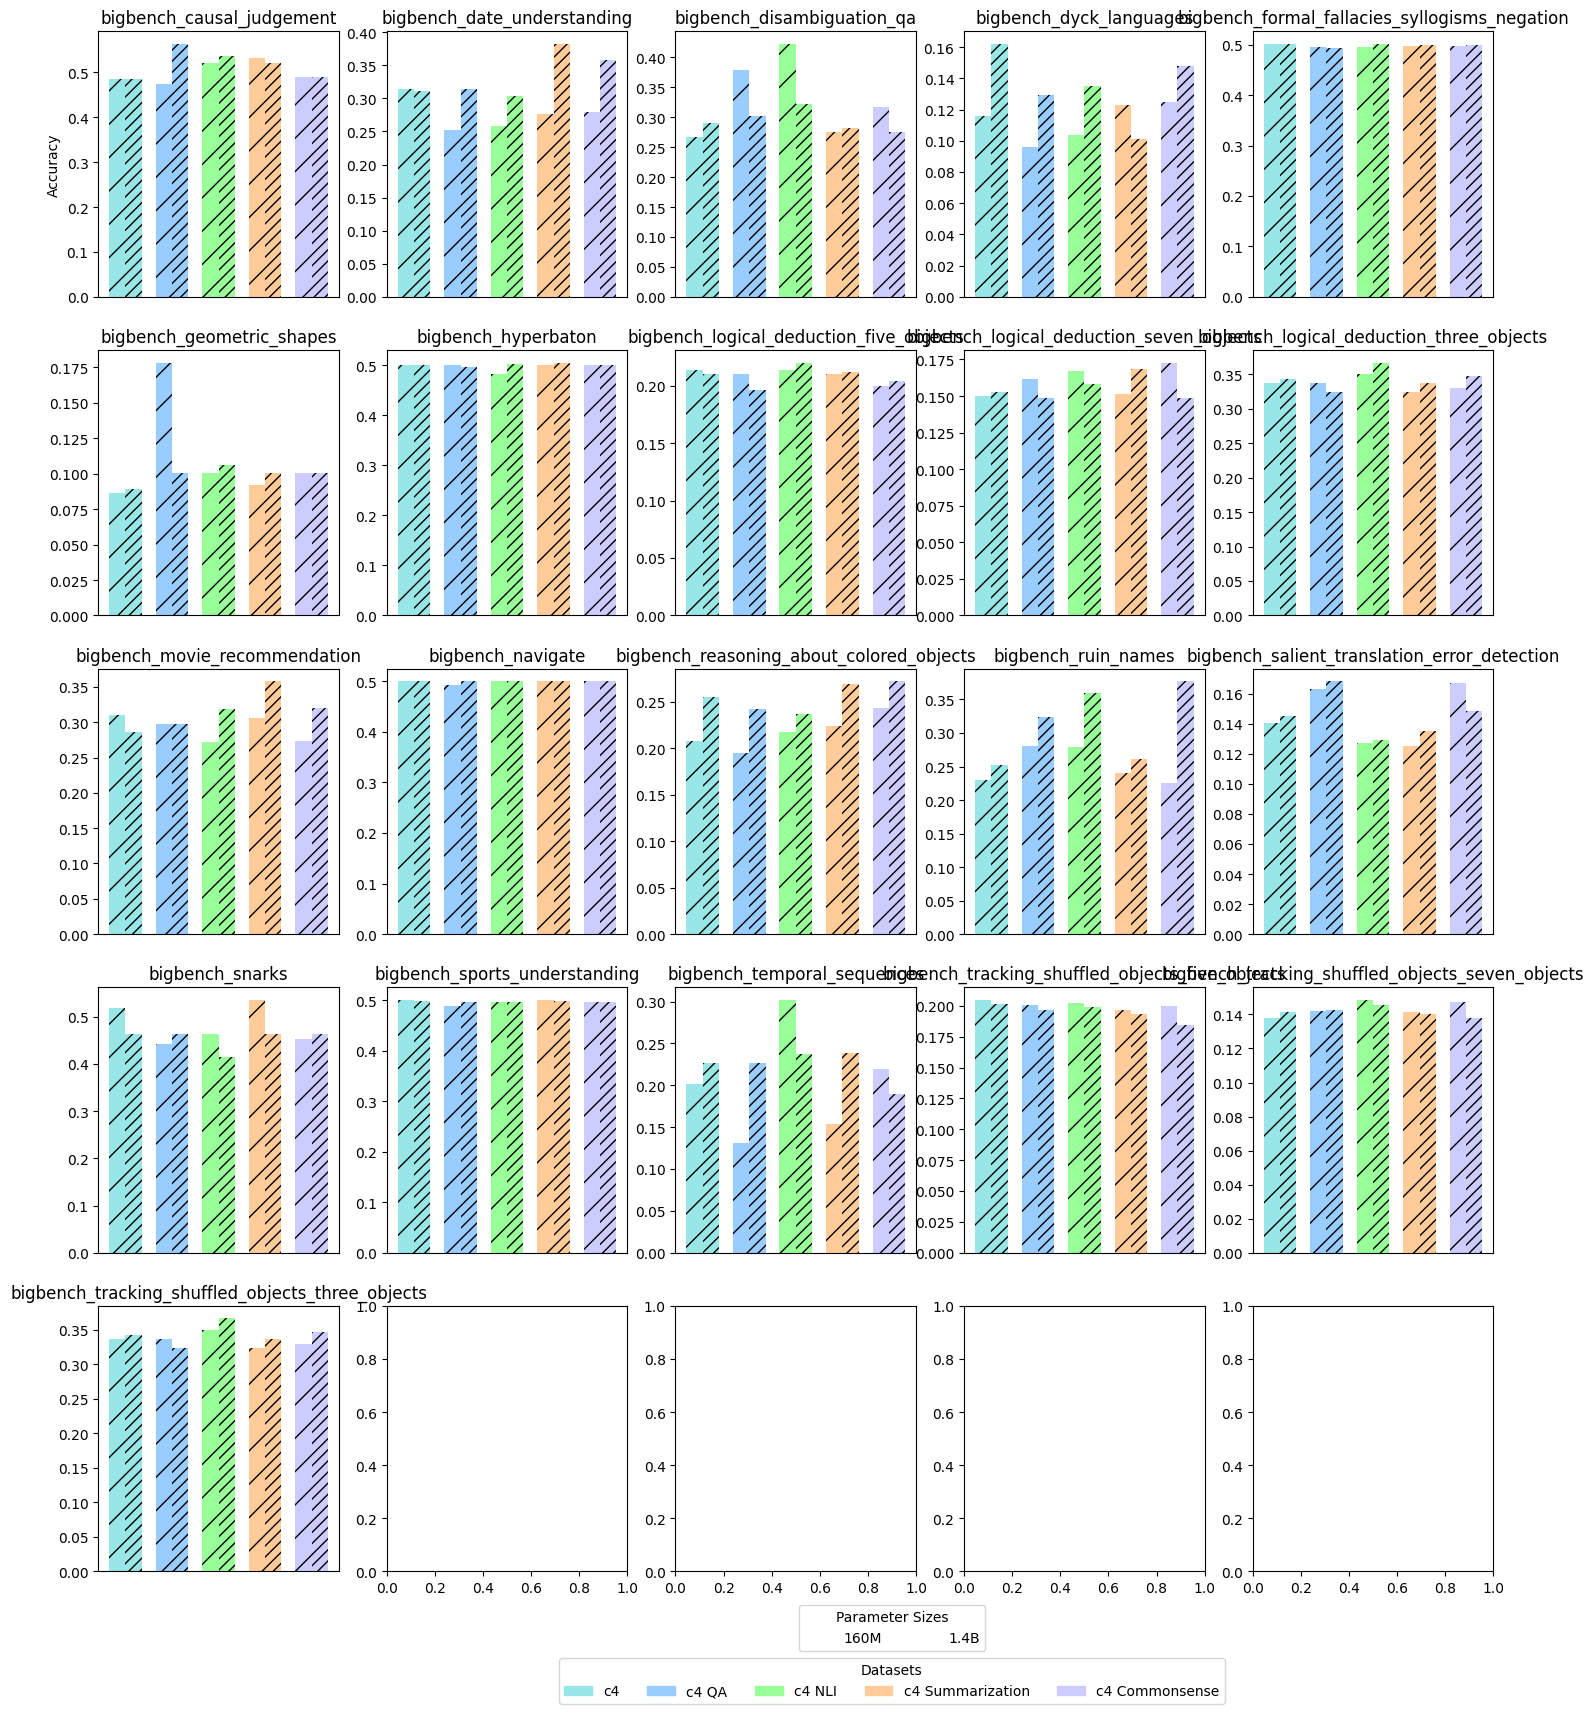

In [21]:
# PARAM_SIZES = ["160M", "1.4B"]
MODEL_ORDER = ["c4 160M", "c4 QA 160M", "c4 NLI 160M", "c4 Summarization 160M", "c4 Commonsense 160M", 
               "c4 1.4B", "c4 QA 1.4B", "c4 NLI 1.4B", "c4 Summarization 1.4B", "c4 Commonsense 1.4B"]
DATASETS_BAR = list(new_results_dict.keys())
filtered_results_dict = {key: new_results_dict[key] for key in results_dict if any(substring in key for substring in DATASETS_BAR)}
import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.35  # Set the width of the bars
num_tasks = len(filtered_results_dict.keys())
num_columns = 5
num_rows = num_tasks // num_columns + (num_tasks % num_columns > 0)
fig, axs = plt.subplots(num_rows, num_columns, figsize=(18, num_rows * 4))

for i, task in enumerate(filtered_results_dict.keys()):
    models = new_results_dict[task]
    model_names = []
    model_scores = []
    model_colors = []  # List to store colors for each model
    for training_set, param_sizes in models.items():
        for param_size, results in param_sizes.items():
            model = f"{training_set} {param_size}"
            sel_metric = metric[0] if metric[0] in results else metric[1]
            if sel_metric not in results:
                continue
            model_names.append(model)
            model_scores.append(results[sel_metric])
            # model_colors.append(model_to_color[model])  # Get the color for the model
            model_colors.append(dataset_to_color[training_set])


    # Sort the scores and their corresponding names and colors
    sorted_scores_indices = np.argsort(model_scores)
    model_scores = [model_scores[i] for i in sorted_scores_indices]
    model_names = [model_names[i] for i in sorted_scores_indices]
    model_colors = [model_colors[i] for i in sorted_scores_indices]

    # Separate models based on parameter size
    models_160M = [model for model in model_names if '160M' in model]
    scores_160M = [model_scores[model_names.index(model)] for model in models_160M]
    colors_160M = [model_colors[model_names.index(model)] for model in models_160M]

    models_1_4B = [model for model in model_names if '1.4B' in model]
    scores_1_4B = [model_scores[model_names.index(model)] for model in models_1_4B]
    colors_1_4B = [model_colors[model_names.index(model)] for model in models_1_4B]

    # Sort the models based on MODEL_ORDER
    sorted_model_names = sorted(models_160M + models_1_4B, key=lambda x: MODEL_ORDER.index(x))
    # Sort the models_160M, scores_160M, colors_160M based on sorted_model_names
    models_160M, scores_160M, colors_160M = zip(*sorted(zip(models_160M, scores_160M, colors_160M), key=lambda x: sorted_model_names.index(x[0])))

    # Sort the models_1_4B, scores_1_4B, colors_1_4B based on sorted_model_names
    models_1_4B, scores_1_4B, colors_1_4B = zip(*sorted(zip(models_1_4B, scores_1_4B, colors_1_4B), key=lambda x: sorted_model_names.index(x[0])))

    x_160M = np.arange(len(models_160M))
    x_1_4B = np.arange(len(models_1_4B)) + bar_width

    # Plot the scores as bar plot
    axs = axs.flatten()
    bars_160M = axs[i].bar(x_160M, scores_160M, color=colors_160M, width=bar_width)
    bars_1_4B = axs[i].bar(x_1_4B, scores_1_4B, color=colors_1_4B, width=bar_width)

    # Add hatches to the bars
    for bar in bars_160M:
        bar.set_hatch(hatch_dict['160M'])
    for bar in bars_1_4B:
        bar.set_hatch(hatch_dict['1.4B'])

    # Add model names as x-tick labels
    axs[i].set_xticks(np.concatenate([x_160M, x_1_4B]))
    axs[i].set_xticklabels(models_160M + models_1_4B, rotation=90)

    axs[i].set_title(task)

    if i == 0:
        axs[i].set_ylabel("Accuracy")

    # disable xtick labels and ticks
    axs[i].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    
    # if i == len(axs) - 1:
    #     # Create a legend for the hatches
    #     hatch_handles = [plt.Rectangle((0,0),1,1, color='white', hatch=hatch_dict[param_size]) for param_size in hatch_dict.keys()]
    #     hatch_legend = axs[i].legend(hatch_handles, hatch_dict.keys(), title="Parameter Sizes", loc='upper left', bbox_to_anchor=(0, 1))

    #     # Create a legend for the colors
    #     color_handles = [plt.Rectangle((0,0),1,1, color=dataset_to_color[dataset]) for dataset in dataset_to_color.keys()]
    #     axs[i].legend(color_handles, dataset_to_color.keys(), title="Datasets", loc='upper left', bbox_to_anchor=(0, 0.75))

    #     # Add the hatch legend back manually
    #     axs[i].add_artist(hatch_legend)

# Create a legend for the hatches
hatch_handles = [plt.Rectangle((0,0),1,1, color='white', hatch=hatch_dict[param_size]) for param_size in hatch_dict.keys()]
hatch_legend = plt.legend(hatch_handles, hatch_dict.keys(), title="Parameter Sizes", loc='upper center', 
                          bbox_to_anchor=(-1.5, -0.1), ncol=len(hatch_dict.keys()), handlelength=2)

# Create a legend for the colors
color_handles = [plt.Rectangle((0,0),1,1, color=dataset_to_color[dataset]) for dataset in dataset_to_color.keys()]
plt.legend(color_handles, dataset_to_color.keys(), title="Datasets", loc='upper center', 
           bbox_to_anchor=(-1.5, -0.3), ncol=len(dataset_to_color.keys()), handlelength=2)

# Add the hatch legend back manually
plt.gca().add_artist(hatch_legend)

plt.tight_layout()
plt.show()


In [22]:
save_path = "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/BIGBENCH"
# if not os.path.exists(save_path):
#     os.makedirs(save_path)

# with open(f"{save_path}/results_few-shot.json", "w") as f:
#     json.dump(new_results_dict, f, indent=4)

In [23]:
average_score_ = collections.defaultdict(lambda: collections.defaultdict(dict))
average_ranking_ = collections.defaultdict(lambda: collections.defaultdict(dict))

for key in average_score.keys():
    model_split = key.split(' ')
    if len(model_split) == 2:
        training_set, param_size = model_split
    elif len(model_split) == 3:
        pre_training_set, training_set, param_size = model_split
        training_set = pre_training_set + ' ' + training_set
    average_score_[training_set][param_size] = average_score[key]
    average_ranking_[training_set][param_size] = average_rankings[key]

accuracy_results_ = collections.defaultdict(lambda: collections.defaultdict(dict))
for task in accuracy_results.keys():
    for model in accuracy_results[task].keys():
        model_split = model.split(' ')
        if len(model_split) == 2:
            training_set, param_size = model_split
        elif len(model_split) == 3:
            pre_training_set, training_set, param_size = model_split
            training_set = pre_training_set + ' ' + training_set
        accuracy_results_[task][training_set][param_size] = accuracy_results[task][model]['metric']
        

if is_few_shot is False:
    base_path = "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/BIGBENCH/"
else:
    base_path = "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/BIGBENCH/few-shot/"

with open(f"{base_path}/average_score.json", "w") as f:
    json.dump(average_score_, f, indent=4)

with open(f"{base_path}/average_ranking.json", "w") as f:
    json.dump(average_ranking_, f, indent=4)

with open(f"{base_path}/results.json", "w") as f:
    json.dump(new_results_dict, f, indent=4)

In [26]:
average_score_ = collections.defaultdict(lambda: collections.defaultdict(dict))
average_ranking_ = collections.defaultdict(lambda: collections.defaultdict(dict))

for key in average_score.keys():
    model_split = key.split(' ')
    if len(model_split) == 2:
        training_set, param_size = model_split
    elif len(model_split) == 3:
        pre_training_set, training_set, param_size = model_split
        training_set = pre_training_set + ' ' + training_set
    average_score_[training_set][param_size] = average_score[key]
    average_ranking_[training_set][param_size] = average_rankings[key]

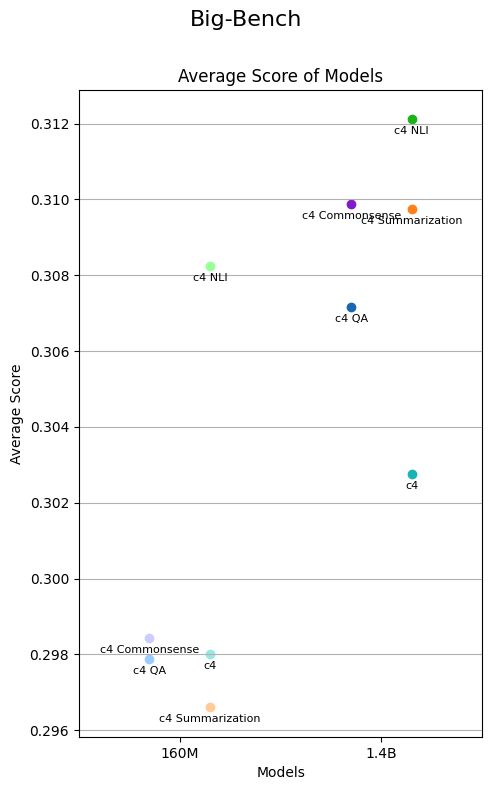

In [27]:
from src.visualize import plot_model_performance

plot_model_performance(average_score_, model_to_color, "Big-Bench")

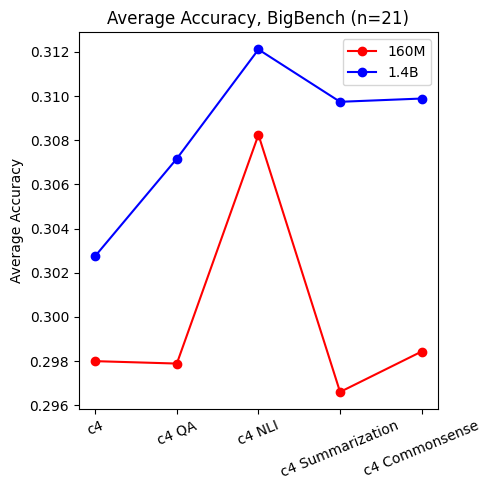

In [24]:
from src.visualize import plot_accuracy_line

PARAM_SIZES = ['160M', '1.4B']
DATASET_ORDER = ["c4", "c4 QA", "c4 NLI", "c4 Summarization", "c4 Commonsense"]
METRICS = {'acc': 'acc', 'std': 'acc_stderr'}
TITLE = f"Average Accuracy, BigBench (n={n_datasets})"
plot_accuracy_line(average_score_, PARAM_SIZES, DATASET_ORDER, title=TITLE)

# export 
import json
# with open(os.path.join(save_path, 'average_score.json'), 'w') as f:
#     json.dump(average_score_, f, indent=4)

with open(os.path.join(save_path, 'average_ranking.json'), 'w') as f:
    json.dump(average_ranking_, f, indent=4)

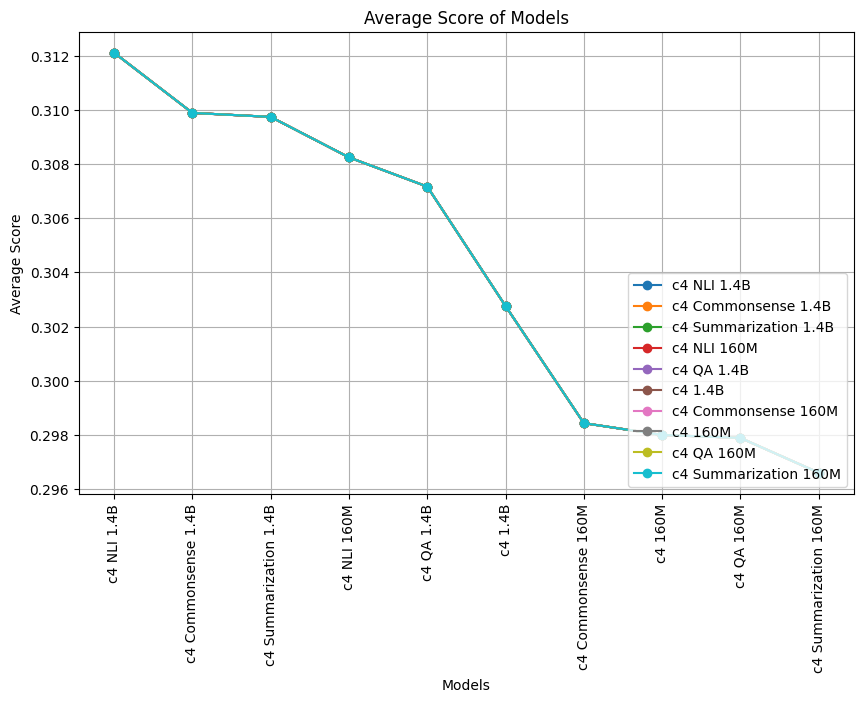

In [26]:
# Assuming 'average_score' is your dictionary of model scores
models = list(average_score.keys())
scores = list(average_score.values())

plt.figure(figsize=(10, 6))

# Plot each model's score as a line
for model, score in average_score.items():
    plt.plot(models, scores, marker='o')

plt.xticks(rotation=90)  # Rotate x-labels for readability
plt.xlabel('Models')
plt.ylabel('Average Score')
plt.title('Average Score of Models')
plt.legend(average_score.keys(), loc='lower right')  # Add a legend
plt.grid(True)  # Add a grid for better visibility of values
plt.show()

In [27]:
import pandas as pd

# Assuming the nested dictionary is stored in 'accuracy_results'
data = {}
for task, task_results in accuracy_results.items():
    for model, model_results in task_results.items():
        if model not in data:
            data[model] = {}
        data[model][task] = model_results['metric']

df = pd.DataFrame(data).T
index_order = average_rankings.keys()
# Reorder the rows of the dataframe
df = df.loc[index_order]
df

,BigBench
c4 NLI 1.4B,0.312111
c4 Commonsense 1.4B,0.309889
c4 Summarization 1.4B,0.309741
c4 NLI 160M,0.308247
c4 QA 1.4B,0.307167
c4 1.4B,0.302757
c4 Commonsense 160M,0.298433
c4 160M,0.297997
c4 QA 160M,0.297888
c4 Summarization 160M,0.296603


In [28]:
results_dict_model_acc = collections.defaultdict(list)

for model in results_dict_tasks['BigBench']:
    for dataset in results_dict_tasks['BigBench'][model]:
        results_dict_model_acc[model].append(results_dict_tasks['BigBench'][model][dataset]['multiple_choice_grade'])
    
from src.visualize import calculate_significance

calculate_significance(results_dict_model_acc)

p-value
c4 NLI 1.4B           c4 NLI 160M            0.930820
                      c4 1.4B                0.830081
                      c4 160M                0.754165
                      c4 Summarization 160M  0.735698
                      c4 QA 160M             0.744922
                      c4 Commonsense 160M    0.753214
                      c4 QA 1.4B             0.911354
                      c4 Commonsense 1.4B    0.959810
                      c4 Summarization 1.4B  0.957615
c4 NLI 160M           c4 1.4B                0.900898
                      c4 160M                0.821942
                      c4 Summarization 160M  0.801878
                      c4 QA 160M             0.814727
                      c4 Commonsense 160M    0.823489
                      c4 QA 1.4B             0.980821
                      c4 Commonsense 1.4B    0.970626
                      c4 Summarization 1.4B  0.973561
c4 1.4B               c4 160M                0.915038
                      c4 Summarization 160M  0.892387
                      c4 QA 160M             0.910360
                      c4 Commonsense 160M    0.919966
                      c4 QA 1.4B             0.920105
                      c4 Commonsense 1.4B    0.870271
                      c4 Summarization 1.4B  0.874369
c4 160M               c4 Summarization 160M  0.976272
                      c4 QA 160M             0.998053
                      c4 Commonsense 160M    0.992186
                      c4 QA 1.4B             0.840041
                      c4 Commonsense 1.4B    0.792233
                      c4 Summarization 1.4B  0.796894
c4 Summarization 160M c4 QA 160M             0.977505
                      c4 Commonsense 160M    0.967829
                      c4 QA 1.4B             0.819493
                      c4 Commonsense 1.4B    0.772785
                      c4 Summarization 1.4B  0.777486
c4 QA 160M            c4 Commonsense 160M    0.989919
                      c4 QA 1.4B             0.833308
                      c4 Commonsense 1.4B    0.784062
                      c4 Summarization 1.4B  0.789009
c4 Commonsense 160M   c4 QA 1.4B             0.842226
                      c4 Commonsense 1.4B    0.792662
                      c4 Summarization 1.4B  0.797561
c4 QA 1.4B            c4 Commonsense 1.4B    0.951221
                      c4 Summarization 1.4B  0.954373
c4 Commonsense 1.4B   c4 Summarization 1.4B  0.997359

In [29]:
from scipy import stats


def calculate_t

SyntaxError: expected '(' (343309691.py, line 4)

In [ ]:
# # keywords = ['QA', 'NLI', 'Summarization', 'Commonsense', '1.4B', '160M', 'ds']  # replace with your keywords

# # # Define a function to keep all the keywords in the string
# # def keep_keywords(s):
# #     found_keywords = [keyword for keyword in keywords if keyword in s]
# #     return '_'.join(found_keywords) if found_keywords else s

# # # Apply the function to the DataFrame index
# # df.index = df.index.map(keep_keywords)

# df.to_csv(os.path.join('/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/exp1', 'exp1_results1.csv'))